# Newton-Raphson
Alumno: Oscar De la Cruz Echeveste

El ejercicio consiste en crear un código que, dado un polinomio de cualquier
grado (máximo 10), pueda encontrar las raı́ces usando el método de Newton-
Raphson. El código se pondrá a prueba con un polinomio arbitrario que yo
eligiré a la hora de correr su código. El bloque donde se especifica el polinomio
dentro del notebook deberá estar especificado y es lo único que modificaré.
Suerte

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Definimos una función de la forma:
\begin{equation}
f(x) = \sum_{i=0}^{10} a_i x^i 
\end{equation}

In [2]:
def f(x,a): #donde a es un array con los coeficientes del polinomio
    return a[0] + a[1]*x + a[2]*np.power(x,2) + a[3]*np.power(x,3) + a[4]*np.power(x,4) + a[5]*np.power(x,5) + a[6]*np.power(x,6) + a[7]*np.power(x,7) + a[8]*np.power(x,8) + a[9]*np.power(x,9) + a[10]*np.power(x,10)

Y su primera derivada:
\begin{equation}
f'(x) = \sum_{i=1}^{10} i\times a_i x^{i-1} 
\end{equation}

In [3]:
def df(x,a): #donde a es un array con los coeficientes del polinomio
    return a[1] + 2*a[2]*x + 3*a[3]*np.power(x,2) + 4*a[4]*np.power(x,3) + 5*a[5]*np.power(x,4) + 6*a[6]*np.power(x,5) + 7*a[7]*np.power(x,6) + 8*a[8]*np.power(x,7) + 9*a[9]*np.power(x,8) + 10*a[10]*np.power(x,9)

Ahora, definimos la función para calcular las raices del polinomio:

In [4]:
def raices(x,a):
    raices = [] #Array para guardar todas las raices
    pre = []
    for i in range(len(x)): #Tomamos como punto p_0 todos los punto de del intervalo [a,b].   
        p_0 = x[i]
        j = 0
        while abs(f(p_0,a)) > 0.00000000001: #Hacemos el metodo con precisión de 10*-6
            p_0 = p_0 - (f(p_0,a)/df(p_0,a))
            j = j + 1
            if j > 1000000: # Si el ciclo se repite demasiadas veces asumimos que no hay raices
                break 
        if round(p_0,3) in np.round(raices,3): # Si las raiz encontrada se repite, ya no la agregamos al array
            p_0 = p_0
        else:    
            raices.append(p_0)
            pre.append(f(p_0,a))
        if j > 1000000:
            print("EL POLINOMIO NO TIENE RAICES REALES")
            return False, False
            break
    return raices, pre

#### Introducimos los valores de los coeficientes $a_{i}$  con $ i = 0,1,...,10 $ para definir el polinomio (Aqui modificamos):

In [5]:
#Definir polinomio eligiendo los coeficientes:
    
a_0 = 0
a_1 = 1
a_2 = -1
a_3 = -4
a_4 = 4 
a_5 = 0
a_6 = -8
a_7 = 0
a_8 = -3
a_9 = 0
a_10 = 0

a = [a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10]

Vemos como se ve el polinomio seleccionado en el intervalo [b,c] 

#### Nota podemos cambiar el interbalo [b,c] segun como veamos la grafica para hacer más raipido el cálculo 

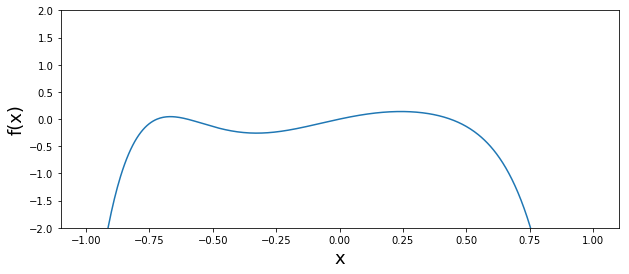

In [13]:
#definimos el intervalo 
b = -1
c = 1

x = np.linspace(b,c,500)
y = f(x,a)

plt.figure(figsize=(10,4))
plt.plot(x,y,'-')
plt.ylim(-2,2)
plt.xlabel("x",fontsize=18)
plt.ylabel("f(x)",fontsize=18)
plt.show()

#### Calculamos las raices (si no hay raices reales tarda en arrojar el resultado):

las raices son: [-0.719153 -0.       -0.60106   0.43603 ]
la precisiń de los resultados son: [-4.3298697960381105e-15, -1.6814714600837393e-13, -2.0816681711721685e-16, -9.020562075079397e-17]


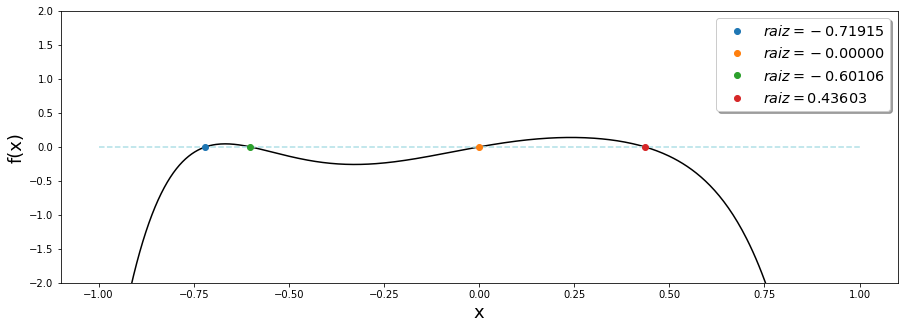

In [9]:
plt.figure(figsize=(15,5))
raiz , pres = raices(x,a)

if raiz == False:
    print (raiz)

else:
    print("las raices son:", np.round(raiz,6))
    print("la precisiń de los resultados son:", pres )
    x_n = np.linspace(b,c,500) # Para graficar la función
    y_n = f(x_n,a)
    y_l = np.zeros(len(x_n)) # Para graficar linea en eje y = 0 
    plt.plot(x_n,y_n, "k")
    plt.plot(x_n,y_l, "--", color = 'powderblue')
    for i in range(len(raiz)):
        plt.plot(raiz[i],f(raiz[i],a),'o',label='$raiz={:.5f}$'.format(raiz[i])) # Mostramos en gráfica todas las raices
    plt.xlabel("x",fontsize=18)
    plt.ylabel("f(x)",fontsize=18)
    plt.ylim(-2,2)
    plt.legend(loc='upper right', shadow=True, fontsize='x-large')
    plt.show()